# CW2
## Hanlin Liu    02081102

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import warnings

# ignore warnings
warnings.filterwarnings("ignore")
# plotting preferences updates
colors = ['#132A36', '#780627','#4692BD', '#079069']

# Set plotting parameters
params = {'figure.figsize': (6.0,6.0),
          'axes.labelsize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'legend.fontsize': 12,
          'font.size': 12
           }

plt.rcParams.update(params)

In [2]:
# compute Hénon map equations
def Henon_map(X, a, b=0.3):
    x,y = X
    return [1 - a*x**2 + y, b*x]

# compute Jacobian of the map
def Henon_Jacobian(X, a, b=0.3):
    x,y = X
    return np.array([[-2*a*x, 1], [b, 0]])

# Gram-Schmidt reorthogonalization function
def gram_schmidt(vectors):
    dim = vectors.shape[1]
    ortho_vectors = np.copy(vectors)
    norms = np.zeros(dim)

    for i in range(dim):
        for j in range(i):
            proj = np.dot(ortho_vectors[:, j], ortho_vectors[:, i]) * ortho_vectors[:, j]
            ortho_vectors[:, i] -= proj
        norms[i] = np.linalg.norm(ortho_vectors[:, i])
        ortho_vectors[:, i] /= norms[i]

    return ortho_vectors, norms

# Function to compute the Lyapunov exponent
def compute_lyapunov(a, X0, N=5000, T=1000):
    """
    Computes the Lyapunov exponent for the logistic map.

    Parameters:
        r (float): Control parameter of the logistic map
        x0 (float): Initial condition (default = 0.2)
        N (int): Total number of iterations
        T (int): Transient steps to discard

    Returns:
        lambda_lyap (float): Estimated Lyapunov exponent
    """
    X = X0 # initial condition
    dX = np.eye(2)  # Initial orthonormal perturbation vectors
    lyapunov_sum = np.zeros(2)

    # Iterate the Hénon map
    for n in range(N):
        X = Henon_map(X, a)  # Update x_n to x_{n+1}
        
        # Compute tangent vectors and reorthogonalize using Gram-Schmidt
        J = Henon_Jacobian(X, a)
        dX = J @ dX
        dX, norms = gram_schmidt(dX)

        if n >= T:  # Skip transient iterations
            lyapunov_sum += np.log(norms) # Accumulate logarithms of norms

    # Compute the average Lyapunov exponent
    lambda_lyap = lyapunov_sum / (N - T)
    return lambda_lyap

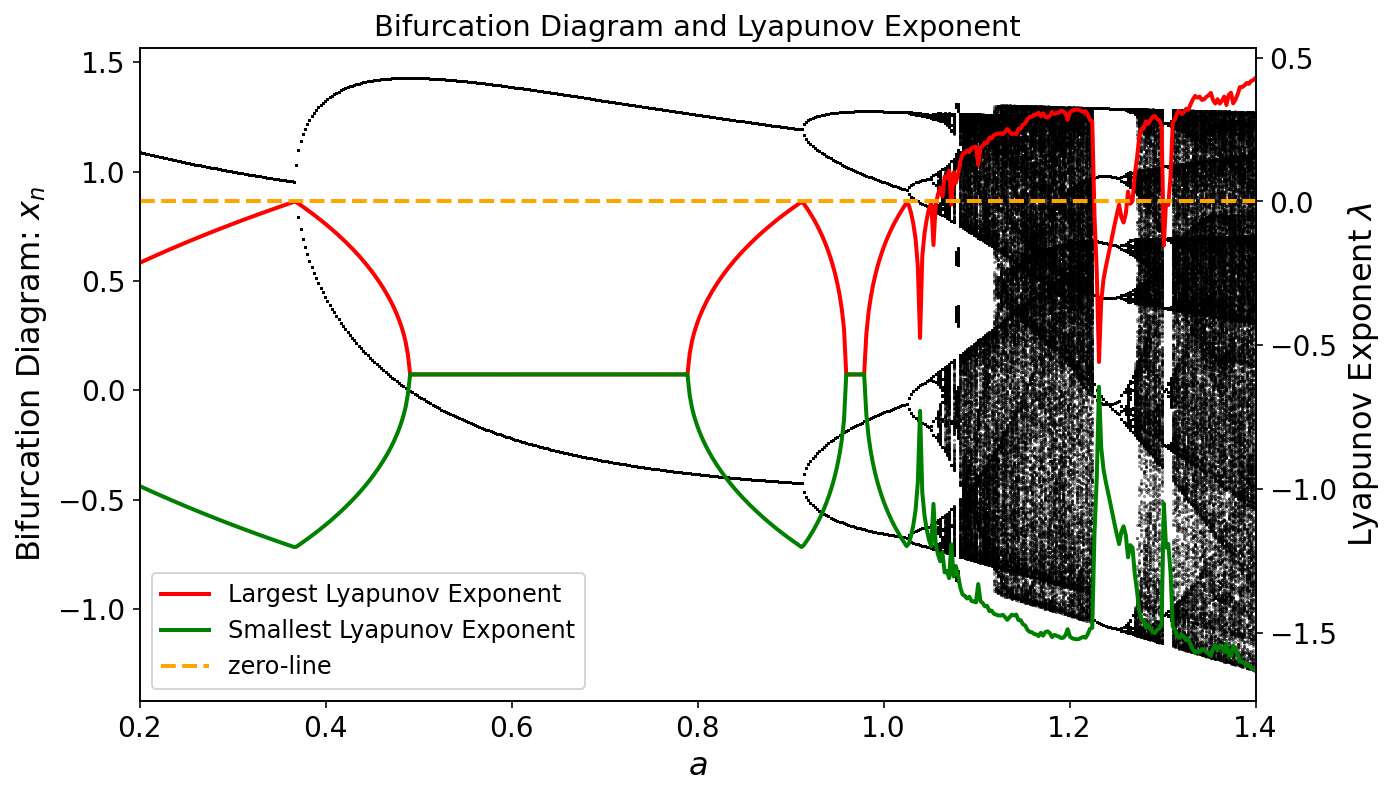

In [3]:
# values of a
a_values = np.linspace(0.2, 1.4, 500)
# initial condition
X0 = [0,0]

# Compute Lyapunov exponents
lyapunov_exponents = np.array([compute_lyapunov(a, X0) for a in a_values])

# Compute bifurcation diagram
num_iterations = 5000  # Total iterations
last_iterations = 1000  # Number of last iterations to plot

bifurcation_data = []

for a in a_values:
    X = X0.copy()
    trajectory = []
    for _ in range(num_iterations):
        X = Henon_map(X, a)
        if _ >= (num_iterations - last_iterations):  # Store only last iterations
            trajectory.append((a, X[0])) # only x_n
    bifurcation_data.extend(trajectory)

bifurcation_data = np.array(bifurcation_data)  # Convert to numpy array

# Plot bifurcation diagram and Lyapunov exponent together
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bifurcation diagram
ax1.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.2, color="black", alpha=0.5)
ax1.set_xlabel("$a$")
ax1.set_ylabel("Bifurcation Diagram: $x_n$")
ax1.set_xlim([0.2,1.4])
ax1.set_title("Bifurcation Diagram and Lyapunov Exponent")

# Lyapunov exponent plot (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(a_values, lyapunov_exponents[:, 0], color="red", linewidth=2, label="Largest Lyapunov Exponent")
ax2.plot(a_values, lyapunov_exponents[:, 1], color="green", linewidth=2, label="Smallest Lyapunov Exponent")
ax2.axhline(0, color='orange', linestyle="dashed", linewidth=2, label="zero-line")  # Zero reference line
ax2.set_ylabel("Lyapunov Exponent $\\lambda$")
ax2.legend(loc="lower left")

plt.show()